# Edafa on ImageNet dataset

This notebook shows an example on how to use Edafa to obtain better results on **classification task**. We use [ImageNet](http://www.image-net.org/) dataset which has **1000 classes**. We use *Keras* and pretrained weights of VGG16. At the end we compare results of the same model with and without augmentations.

#### Import dependencies

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# add our package directory to the path
import sys
sys.path.append('../../')
sys.path.append('../')

In [3]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


#### Constants

In [ ]:
# Filename to use for comparison (3 sample files are given in 'data' folder)
FILE = '000559'

# Input size of the deeplab model
IN_SIZE = 224

#### Now we build our model (using pretrained weights)

In [ ]:
model = VGG16(weights='imagenet', include_top=True)

 99000320/553467096 [====>.........................] - ETA: 16:46

#### Read and preprocess image

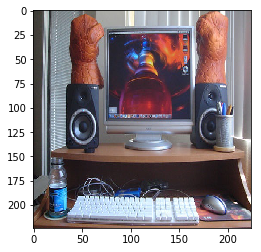

In [6]:
img_path = 'data/images/%s.jpg'%FILE
img = image.load_img(img_path, target_size=(IN_SIZE, IN_SIZE))
plt.imshow(img)

In [7]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

### Exp1: Predict image without augmentation

In [8]:
preds_without = model.predict(x)

### Exp2: Using same model with Edafa

#### step 1: import base class `ClassPredictor`

In [9]:
from edafa import ClassPredictor

#### step 2: inherit `ClassPredictor` and implement the main virtual functions: predict_patches()

In [10]:
class myPredictor(ClassPredictor):
    def __init__(self,vgg16,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.model = vgg16
        
    def predict_patches(self,patches):
        return self.model.predict(patches)

#### step 3: make an instance of your class with the correct parameters

In [11]:
p = myPredictor(model,"../conf/imagenet.json")

#### step 4: call predict_images()

In [12]:
preds_with = p.predict_images(x)

In [13]:
## Compare results of Exp1 and Exp2

In [14]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted without augmentation:', decode_predictions(preds_without, top=2)[0])
print('Predicted with augmentation:', decode_predictions(preds_with, top=2)[0])

Predicted without augmentation: [('n04404412', 'television', 0.1456603), ('n03180011', 'desktop_computer', 0.104833364)]
Predicted with augmentation: [('n03180011', 'desktop_computer', 0.13454285), ('n04404412', 'television', 0.12845169)]


We can clearly see from the object image that it's a **desktop computer**.
With *no augmentation* the top prediction is **television**.
With *augmentation* the top prediction is **desktop computer**

### Conclusion
Results showed that with the exact same model and by applying Edafa we can obtain better results!